### Bo Hong - Assignment 1

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def binary_search(list, item):
    
    low = 0
    high = len(list) - 1

    while low <= high:
        mid = (low + high) // 2
        guess = list[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1
    
    return None, runtime

In [3]:
def linear_search(list, item):
    
    i = 0
    high = len(list) - 1
    
    while i <= high:
        if list[i] == item:
            return i
        else:
            i = i + 1

    return None, runtime

In [4]:
np.random.seed(393)
array_lengths = [512, 1024, 2048, 4096, 8192]

# I used the random number generator to select my random number
# I defined array lengths early on to use it in the loop below

In [5]:
def generate_rand_array(x):
    return np.random.randint(0, x, x)

# I generated a random array from 0 to max value as defined above in array_lengths

In [6]:
results = []

# Empty results and will add in values

In [7]:
for x in range(len(array_lengths)):
    
    array_length = array_lengths[x]
    # Example.. array length of 512
    
    # generating array
    rand_array = generate_rand_array(array_length)
    
    # sorting
    start = time.clock()*1000
    rand_array.sort()
    end = time.clock()*1000
    sort_time = end - start
    # I will calculate runtime for each sort, linear search and binary search
    
    max_value = rand_array[array_length - 1]
    # Max value is called to check time to search in linear and binary search
    
    # linear search
    start = time.clock()*1000
    linear_value = linear_search(rand_array, max_value)
    end = time.clock()*1000
    linear_time = end - start
    
    # binary search
    start = time.clock()*1000
    binary_value = binary_search(rand_array, max_value)
    end = time.clock()*1000
    binary_time = end - start
    
    linear_sort = linear_time + sort_time
    binary_sort = binary_time + sort_time
    
    results.append([array_length, sort_time, linear_time, binary_time, linear_sort, binary_sort])
    # length and times for each steps are added into the empty results called earlier

In [17]:
np_results = np.array(results) # changing into numpy array
print(np_results[:,0])
# checking lengths

[  512.  1024.  2048.  4096.  8192.]


In [9]:
print(np_results[:,1])
# checking sort times

[ 0.058525    0.04153387  0.08646596  0.19936257  0.40552159]


In [10]:
print(np_results[:,2])
# checking linear time

[ 0.07853677  0.15329773  0.39834756  0.67058318  1.33248201]


In [11]:
print(np_results[:,3])
# checking binary time

[ 0.00453097  0.00339823  0.01132742  0.00528613  0.00566371]


In [12]:
print(np_results[:,4])
# checking linear plus sort time

[ 0.13706177  0.1948316   0.48481352  0.86994575  1.7380036 ]


In [13]:
print(np_results[:,5])
# checking binary plus sort time

[ 0.06305596  0.04493209  0.09779338  0.2046487   0.4111853 ]


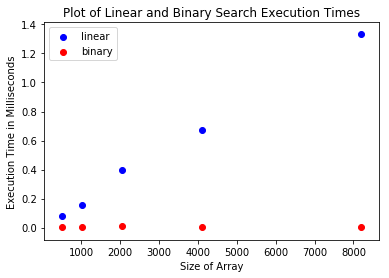

In [14]:
%matplotlib inline

fig, axis = plt.subplots()
plt.xlabel('Size of Array')
plt.ylabel('Execution Time in Milliseconds')
plt.title('Plot of Linear and Binary Search Execution Times')
a = plt.scatter(np_results[:,0], np_results[:,2], c='b')
b = plt.scatter(np_results[:,0], np_results[:,3], c='r')
plt.legend((a, b), ('linear', 'binary'))

# plot of size of random array vs execution times

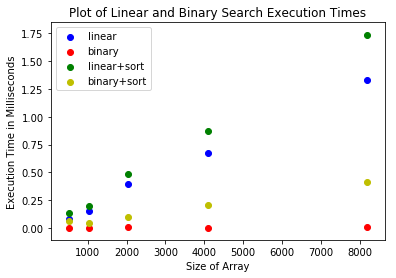

In [15]:
%matplotlib inline

fig, axis = plt.subplots()
plt.xlabel('Size of Array')
plt.ylabel('Execution Time in Milliseconds')
plt.title('Plot of Linear and Binary Search Execution Times')
a = plt.scatter(np_results[:,0], np_results[:,2], c='b')
b = plt.scatter(np_results[:,0], np_results[:,3], c='r')
c = plt.scatter(np_results[:,0], np_results[:,4], c='g')
d = plt.scatter(np_results[:,0], np_results[:,5], c='y')
plt.legend((a, b, c, d,), ('linear', 'binary', 'linear+sort', 'binary+sort'))

# plot of size of random array vs each form of algorithm tested

From the numerical results and scatterplots, it is clear that binary searches are faster than linear searches. This is especially true as the size of the arrays grow from 512 to 8192. 

Linear searches appear to be a straight line. This shows that the time to execute a simple search takes longer and longer as we increase the array size. This is because we are eliminating the wrong answer one at a time. Therefore, the time to run linear searches linearly increases with respect to the array size. Larger arrays (8192) are going to take much longer (1.62 ms) than smaller arrays (512, 0.10 ms). Sorting time appears to take longer for larger arrays (0.52 ms for 8192 and 0.13 ms for 512) and this can be shown in green dots. For larger array sizes, the distance between green and blue dots increases. 

On the other hand, binary searches take far less since it cuts each step in half and achieves the result in far fewer steps. The time to execute binary searches are logarithmic as shown in red dots. The execution time for an array size of 8192 is 0.007 ms when it is 0.006 ms for an array size of 512. Even with sorting times, binary searches are shown to be much faster algorithms.

Big O notations are important to data engineers as they can compare different algorithms. As Bhargava mentions in his book, Grokking Algorithms, data engineers need to know how fast or slow an algorithm runs especially when data is large and time is of essense. Big O notations allow data engineers to compare the number of operations to run the algorithm and gauge how fast the algorithm will grow. It shows the number of operations the algorithm will run. As shown in the scatterplots, the number of operations is far fewer in binary searches than linear searches.